In [5]:
import pandas as pd
import math
import csv
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error
import sklearn.model_selection as cv
import sklearn.datasets as datasets
# from sklearn.model_selection import GridSearchCV
from statsmodels.tsa.arima.model import ARIMA
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pandas.plotting import autocorrelation_plot

In [7]:
df_model = pd.read_excel('test_df_model.xlsx',engine='openpyxl')

In [8]:
df_final = pd.read_excel('test_df_final.xlsx',engine = 'openpyxl')

In [92]:
#convert data to log
ts_low = df_model['yest_low'].values
value = [math.log(x) for x in ts_low]
result = pd.DataFrame(value)
result.index = pd.date_range(start=0, end= len(result), freq='D')
# result = result.asfreq('D')    
# ts_low = [lambda x: math.log(x) for x in ts_low]
# ts_low
result

ValueError: Length mismatch: Expected axis has 1200 elements, new values have 1 elements

In [75]:
[x.capitalize() for x in ['cat', 'dog', 'cow']]

['Cat', 'Dog', 'Cow']

In [70]:
ts_low = ts_low.reset_index()
ts_low = ts_low.asfreq('D', method = 'ffill')

TypeError: '<' not supported between instances of 'Timestamp' and 'int'

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

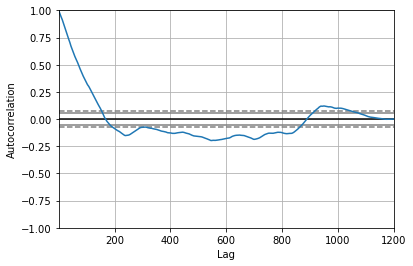

In [20]:
autocorrelation_plot(ts_low)


In [58]:
ts_low

0       3.650658
1       3.630456
2       3.560193
3       3.484312
4       3.514526
          ...   
1195    3.816613
1196    3.819030
1197    3.795939
1198    3.840742
1199    3.843958
Name: yest_low, Length: 1200, dtype: float64

In [60]:
low_model = ARIMA(ts_low, order=(2,1,0)).fit()
len(value)

1

In [61]:
value = low_model.predict(start = 1199)

In [62]:
value.apply(math.exp)

1199    46.54816
dtype: float64

In [16]:


low_model = ARIMA(ts_low, order=(150,20,1)).fit()

/home/jawang/anaconda3/envs/qc_lean/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [39]:
a_low = df_final['low'].iloc[-30:].values
a_low

array([43.535, 43.37 , 44.55 , 46.47 , 45.7  , 48.62 , 47.225, 47.28 ,
       48.06 , 47.38 , 48.14 , 45.32 , 43.01 , 46.7  , 46.34 , 47.16 ,
       47.58 , 48.08 , 50.75 , 49.03 , 49.01 , 48.93 , 47.83 , 47.745,
       45.45 , 45.56 , 44.52 , 46.56 , 46.71 ,  0.   ])

In [51]:
df_final


,date,open,high,low,close,volume,RSI,CMO,Moving Average,MACD,...,yest_high,yest_close,yest_open,yest_RSI,yest_CMO,yest_MA,yest_MACD,yest_MACD_signal,yest_ROC,yest_PPO
0,2016-06-23,39.00,39.0700,37.73,38.31,10948559,31.368794,-37.262412,40.7380,-1.348783,...,39.1600,38.55,38.57,32.448271,-35.103458,40.9975,-1.347707,-1.092787,-7.885305,-4.067848
1,2016-06-24,36.09,37.0800,35.17,35.18,26087127,21.379463,-57.241074,40.3590,-1.583942,...,39.0700,38.31,39.00,31.368794,-37.262412,40.7380,-1.348783,-1.143986,-9.646226,-4.353428
2,2016-06-27,34.84,34.9400,32.60,33.36,28600221,17.824960,-64.350080,39.8710,-1.895318,...,37.0800,35.18,36.09,21.379463,-57.241074,40.3590,-1.583942,-1.231977,-16.317793,-4.930190
3,2016-06-28,34.27,34.6700,33.60,34.67,19673879,27.206216,-45.587568,39.4315,-2.013173,...,34.9400,33.36,34.84,17.824960,-64.350080,39.8710,-1.895318,-1.364645,-17.771753,-5.907668
4,2016-06-29,35.40,36.3750,34.91,36.24,15059708,36.554556,-26.890887,39.0680,-1.957325,...,34.6700,34.67,34.27,27.206216,-45.587568,39.4315,-2.013173,-1.494351,-11.352595,-6.674459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,2021-03-24,46.54,47.3999,45.56,45.61,12120762,44.095482,-11.809035,48.1835,0.740670,...,47.8300,45.64,47.02,44.199608,-11.600784,48.3830,1.025653,1.499144,-4.157917,1.821113
1196,2021-03-25,44.79,47.2150,44.52,47.01,14469133,50.013588,0.027176,48.1215,0.620632,...,47.3999,45.61,46.54,44.095482,-11.809035,48.1835,0.740670,1.347449,-4.581590,1.347092
1197,2021-03-26,47.50,47.9400,46.56,47.66,12361407,52.526389,5.052778,48.1075,0.571365,...,47.2150,47.01,44.79,50.013588,0.027176,48.1215,0.620632,1.202086,-2.711093,1.028019
1198,2021-03-29,47.66,48.1000,46.71,47.32,9824194,51.079928,2.159856,48.0705,0.499132,...,47.9400,47.66,47.50,52.526389,5.052778,48.1075,0.571365,1.075942,-4.354806,0.738583


In [45]:
def Daily_Low(df_model, test_window = 30):

    pred_low = []

    #convert data to log
    ts_low = df_model['yest_low']
    ts_low = ts_low.apply(math.log)

    #fill in missing data for missing dates 
    low_model = ARIMA(ts_low, order=(2,1,0)).fit()

    for i in range(test_window):
        low_model = ARIMA(ts_low[:-test_window+i], order=(2,20,1)).fit()
        pred_value = low_model.predict(start=len(ts_low)-test_window+i)
        pred_low.append(pred_value)

    a_low = df_final['low'].iloc[-test_window:].values
    close_lst = df_final['close'].iloc[-test_window:].values
    open_lst = df_final['open'].iloc[-test_window:].values
    dates = df_final.index[-test_window:]


    d = {'dates':dates,'actual_low': a_low, 'pred_low':pred_low, 'close': close_lst, 'open':open_lst}

    results = pd.DataFrame(d)
    # results['open_minus_pred'] = results['open'] - results['pred_close']
    # results['actual_minus_pred'] = results['actual']-results['pred_close']
    results['off_by'] = results['pred_low']-results['actual_low']

    results['return'] = results['close'] - results['pred_low']

    return results

In [46]:
Daily_Low(df_model)

/home/jawang/anaconda3/envs/qc_lean/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/home/jawang/anaconda3/envs/qc_lean/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/home/jawang/anaconda3/envs/qc_lean/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/home/jawang/anaconda3/envs/qc_lean/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/home/jawang/anaconda3/envs/qc_lean/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check

AttributeError: 'RangeIndex' object has no attribute 'iloc'